In [1]:

import numpy as np
import matplotlib.pyplot as plt
import control as ct
from IPython.display import Markdown
print("exito")

exito


In [2]:
Markdown("<span style='font-size:30px;'>Parámetros de los AO</span>")

<span style='font-size:30px;'>Parámetros de los AO</span>

In [3]:
class LM324:
  s = ct.TransferFunction.s
  # LM324 Parámetros
  ADO = 100e3
  WT = 1e6 * 2 * np.pi
  W1 = 10 * 2 * np.pi
  W2 = 5.06e6 * 2 * np.pi

  @classmethod
  def ft(cls):
    return cls.ADO / ((1 + cls.s / cls.W1) * (1 + cls.s / cls.W2))

class LM6181:
  s = ct.TransferFunction.s
  # LM6181 Parámetros
  ADO = 100e3
  RT = 2.37e6
  CT = 4.8e-12
  W1 = 14e3 * 2 * np.pi
  W2 = 82.3e6 * 2 * np.pi

  @classmethod
  def ft(cls):
    return cls.ADO / (( 1 + cls.s/cls.W1 )*(1 + cls.s/cls.W2))

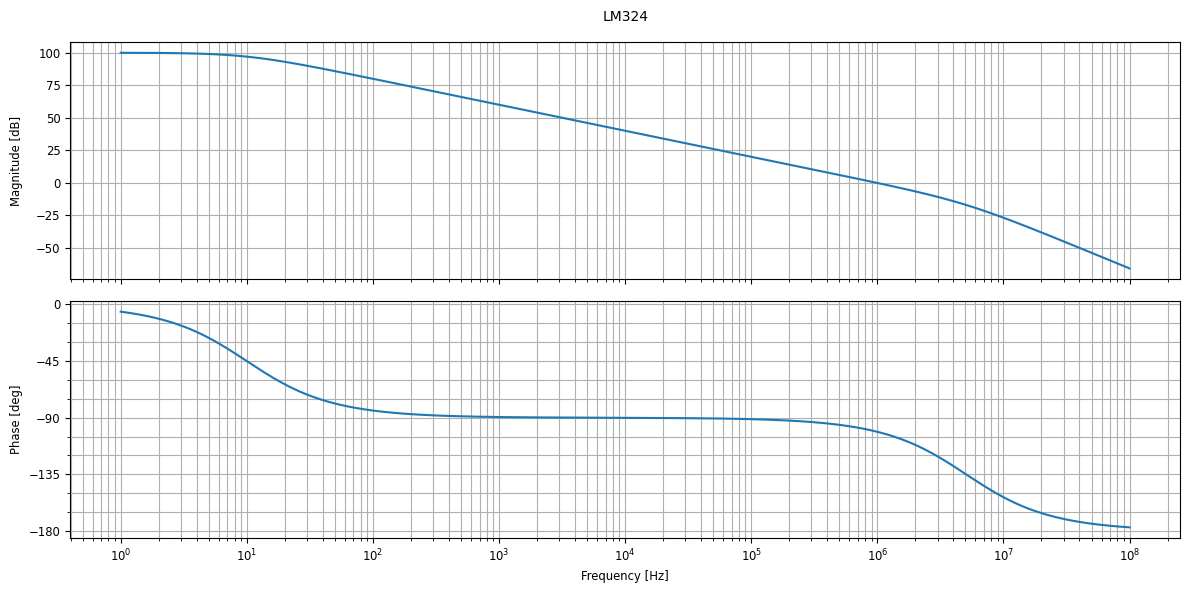

In [4]:

#LM324
plt.figure(figsize=(12, 6))
ct.bode_plot(LM324.ft(), dB = True, Hz = True, title="LM324")
plt.show()

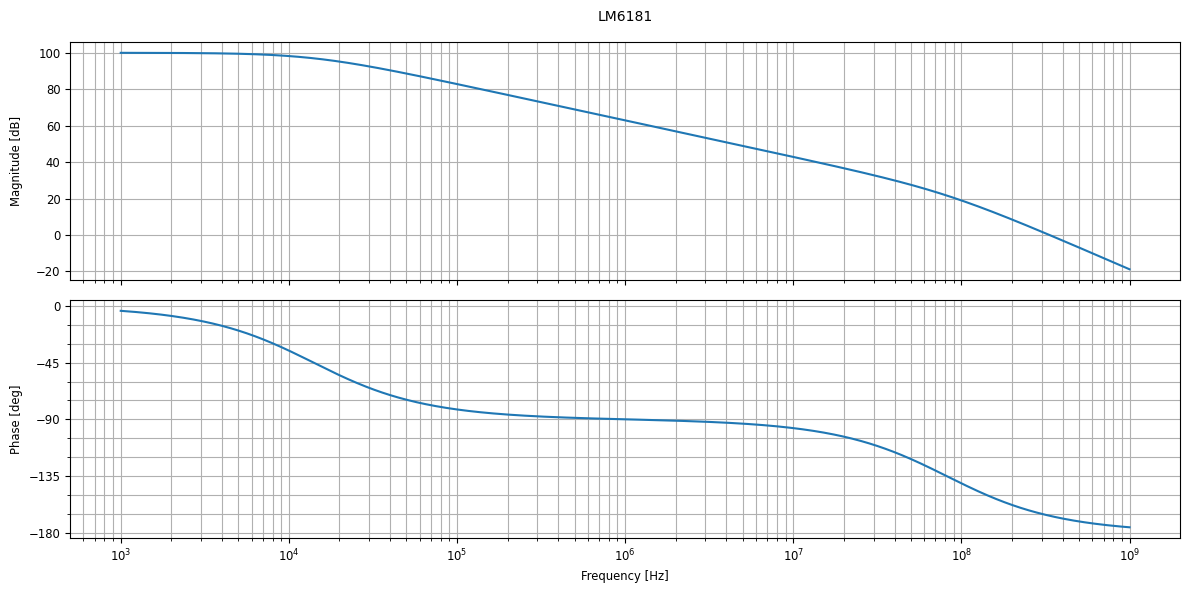

In [5]:
#LM6181
plt.figure(figsize=(12, 6))
ct.bode_plot(LM6181.ft(), dB = True, Hz = True, title="LM6181")
plt.show()
     

In [6]:
Markdown("<span style='font-size:30px;'>VFA-VFA</span>")

<span style='font-size:30px;'>VFA-VFA</span>

In [7]:
Markdown("<span style='font-size:20px;'>Lazo abierto</span>")

<span style='font-size:20px;'>Lazo abierto</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


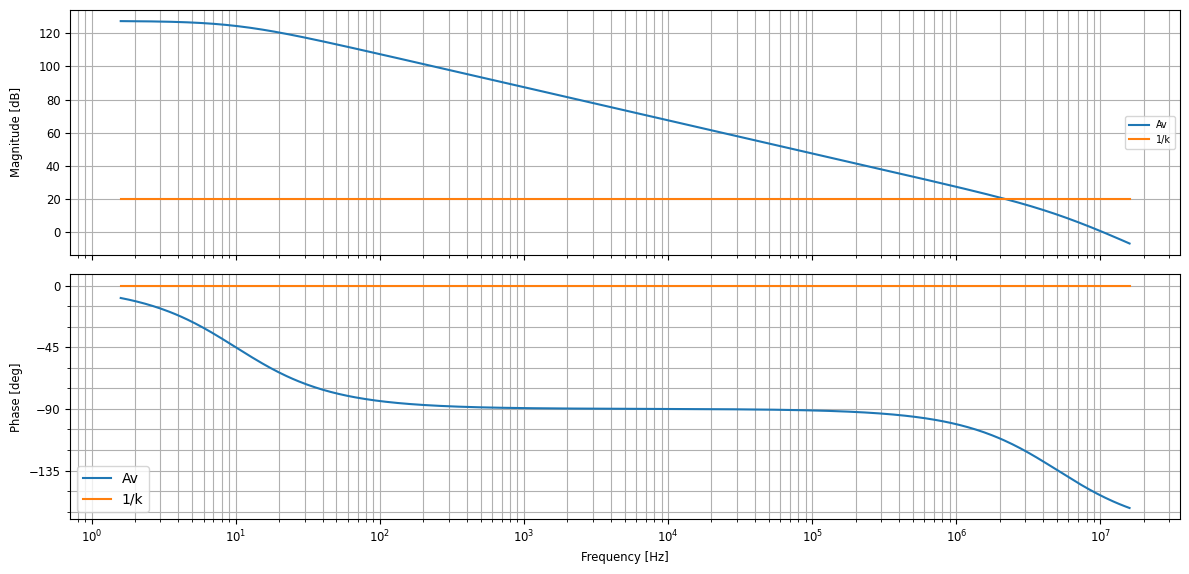

In [8]:
plt.figure(figsize=(12, 6))
omega = np.logspace(1, 8, 500)

#Resistencias
Rf = 9e3
Ri = 1e3
R1 = 1e3
R2 = 22.6e3

k = ct.TransferFunction([Ri/(Ri+Rf)], [1])            #k
av = LM324.ft()*(1 + R2/R1)                           #Lazo Abierto

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(1/k, omega, dB = True, Hz = True, label="1/k", plot=True)

plt.legend()
plt.show()

In [9]:
Markdown("<span style='font-size:20px;'>Lazo cerrado</span>")

<span style='font-size:20px;'>Lazo cerrado</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


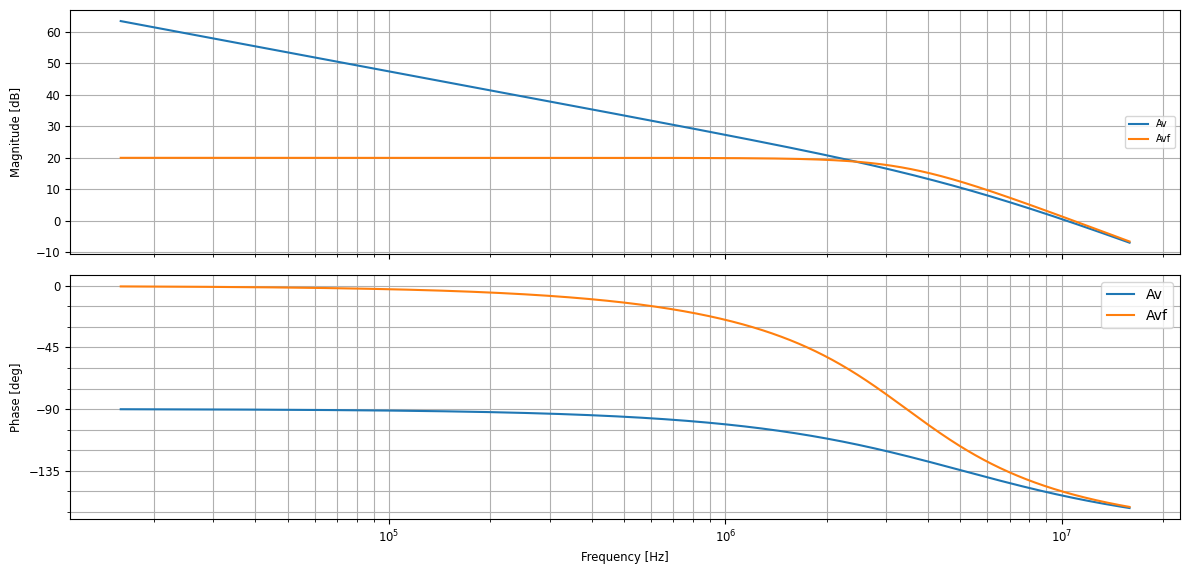

Margen de Fase: 66.78861470848476


In [10]:
plt.figure(figsize=(12, 6))

avf = av/(1+av*k)                                     #Lazo Cerrado
omega = np.logspace(5, 8, num = 5000)

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(avf, omega, dB = True, Hz = True, label="Avf", plot=True)

plt.legend()
plt.show()

g, _ , _ = ct.frequency_response(avf, [0])                    #Obtengo la ganancia estática
magnitude, _ , omega_freq = ct.frequency_response(av, omega)
index = np.argmin(np.abs(magnitude - g))                      #Obtengo la frecuencia de corte
_, phase, _ = ct.frequency_response(av, [omega_freq[index]])  #Obtengo la fase de la frecuencia de corte
print(f"Margen de Fase: {180 - (-phase[0]*180/np.pi)}")       #Margen de Fase

In [11]:
Markdown("<span style='font-size:20px;'>Respuesta al escalón</span>")

<span style='font-size:20px;'>Respuesta al escalón</span>

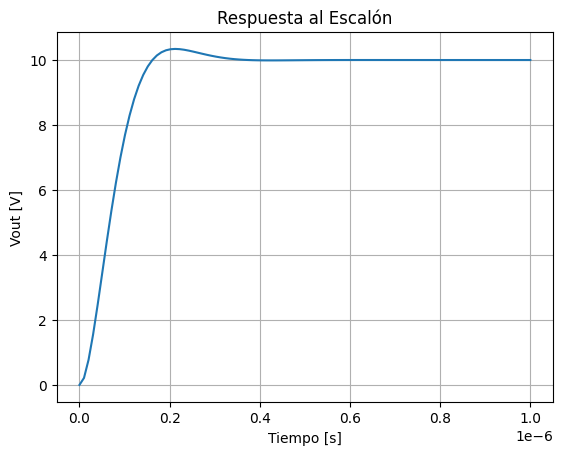

0.03416053261604165
Tiempo de Establecimiento: 0.7321336495599013


In [12]:
t = np.linspace(0, 1e-6, num = 100)
_ , yout  = ct.step_response(avf, T = t)
plt.xlabel('Tiempo [s]')
plt.ylabel('Vout [V]')
plt.title('Respuesta al Escalón')
plt.plot(t, yout)
plt.grid()
plt.show()

index = np.argmax(yout)
Mp = (yout[index] - yout[np.size(yout) - 1])/yout[np.size(yout) - 1]
print(Mp)
psita = -np.log(Mp) / (np.sqrt( np.pi*np.pi + np.log(Mp)*np.log(Mp)))
print(f"Tiempo de Establecimiento: {psita}")

In [13]:
Markdown("<span style='font-size:30px;'>VFA-CFA</span>")

<span style='font-size:30px;'>VFA-CFA</span>

In [14]:
Markdown("<span style='font-size:20px;'>Lazo abierto</span>")

<span style='font-size:20px;'>Lazo abierto</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


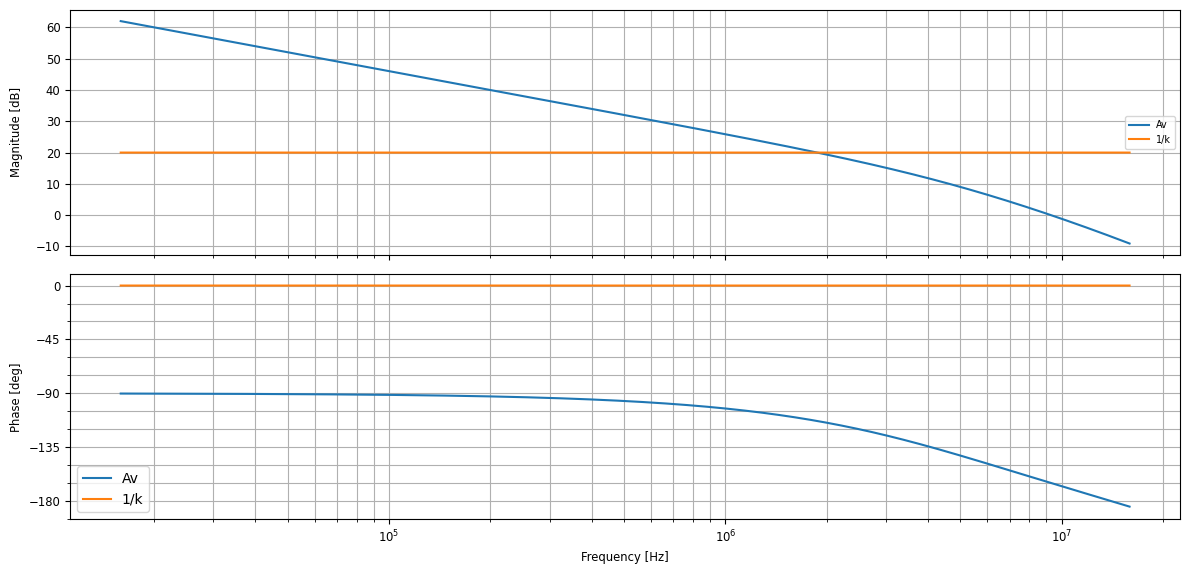

In [15]:

plt.figure(figsize=(12, 6))
omega = np.logspace(5, 8, num = 5000)
s = ct.TransferFunction.s

#Resistencias
Rf = 9e3
Ri = 1e3
R1 = 44.7
R2 = 850

k = ct.TransferFunction([Ri/(Ri+Rf)], [1])            #k
avf_cfa = (1 + R2/R1)/( 1 + (s*(4.8e-12 * R2)) )
av = LM324.ft()*avf_cfa                               #Lazo Abierto

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(1/k, omega, dB = True, Hz = True, label="1/k", plot=True)

plt.legend()
plt.show()

In [16]:
Markdown("<span style='font-size:20px;'>Lazo cerrado</span>")

<span style='font-size:20px;'>Lazo cerrado</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


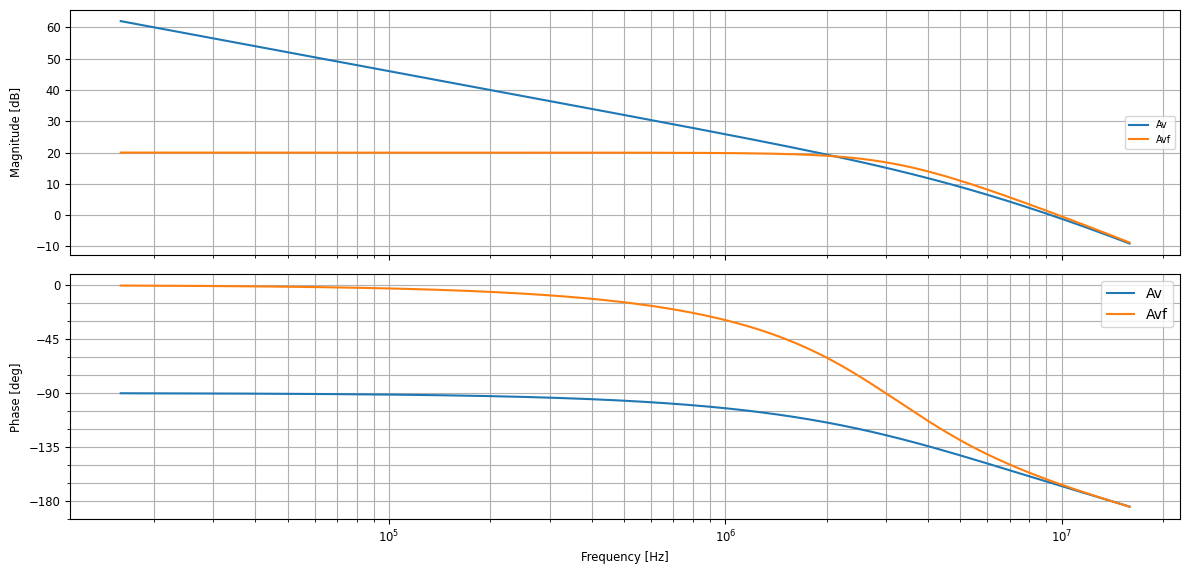

Margen de Fase: 66.92429822610836


In [17]:
plt.figure(figsize=(12, 6))

avf = av/(1+av*k)                                     #Lazo Cerrado
omega = np.logspace(5, 8, num = 5000)

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(avf, omega, dB = True, Hz = True, label="Avf", plot=True)

plt.legend()
plt.show()

g, _ , _ = ct.frequency_response(avf, [0])                    #Obtengo la ganancia estática
magnitude, _ , omega_freq = ct.frequency_response(av, omega)
index = np.argmin(np.abs(magnitude - g))                      #Obtengo la frecuencia de corte
_, phase, _ = ct.frequency_response(av, [omega_freq[index]])  #Obtengo la fase de la frecuencia de corte
print(f"Margen de Fase: {180 - (-phase[0]*180/np.pi)}")       #Margen de Fase

In [18]:
Markdown("<span style='font-size:30px;'>VFA-CFA Compensado</span>")

<span style='font-size:30px;'>VFA-CFA Compensado</span>

In [19]:
Markdown("<span style='font-size:20px;'>Lazo abierto</span>")

<span style='font-size:20px;'>Lazo abierto</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


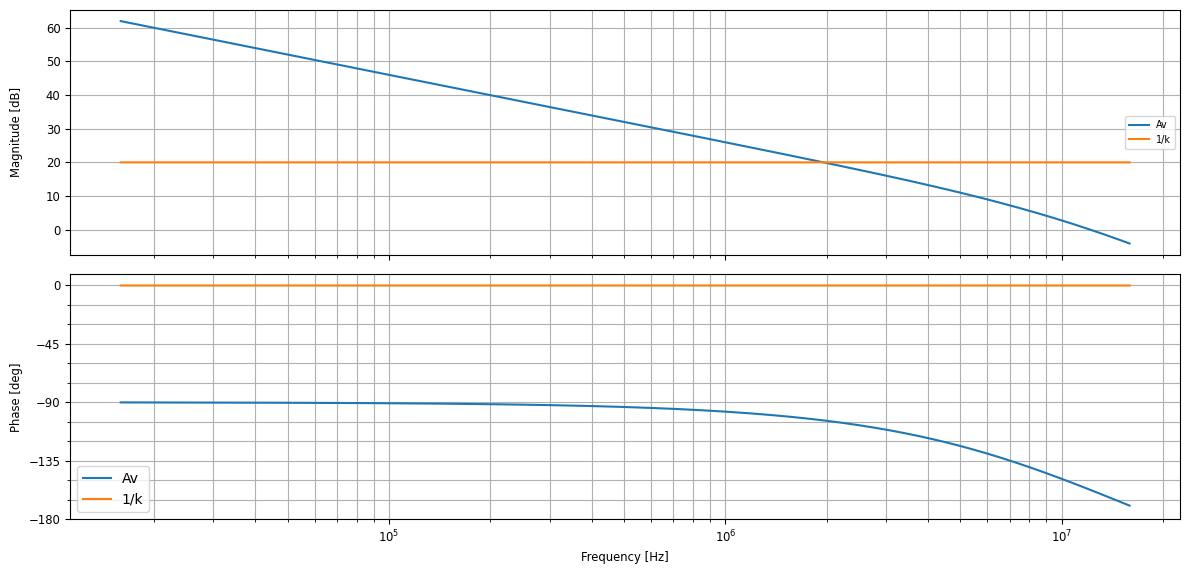

In [20]:
plt.figure(figsize=(12, 6))
omega = np.logspace(5, 8, num = 5000)
s = ct.TransferFunction.s

#Elementos Pasivos
Rf = 9e3
Ri = 1e3
R1 = 21.8
R2 = 850
Rx = 1e3
Ry = 1e3
Cx = 31e-12

k = ct.TransferFunction([Ri/(Ri+Rf)], [1])                    #k
comp = Ry/(Ry + Rx) * (1+s*Cx*Rx)/(1+s*Cx* (Rx*Ry/(Rx+Ry)))   #Compensador
avf_cfa = (1 + R2/R1)/( 1 + (s*(4.8e-12 * R2)) )
av = LM324.ft()*comp*avf_cfa                                       #Lazo Abierto

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(1/k, omega, dB = True, Hz = True, label="1/k", plot=True)

plt.legend()
plt.show()

In [21]:
Markdown("<span style='font-size:20px;'>Lazo cerrado</span>")

<span style='font-size:20px;'>Lazo cerrado</span>

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


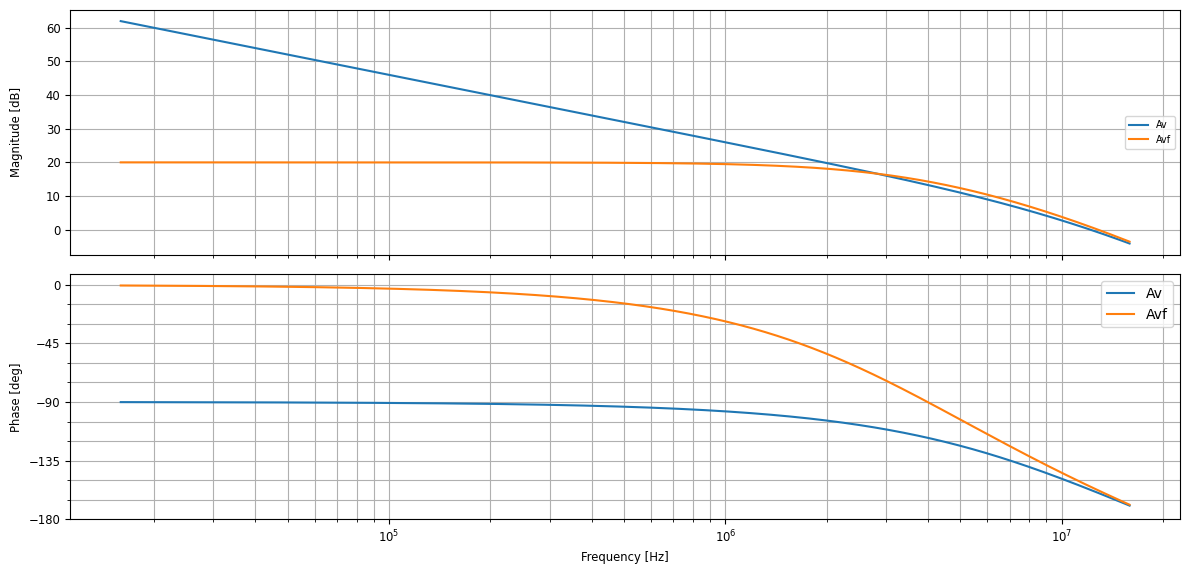

Margen de Fase: 76.04511045587688


In [22]:
plt.figure(figsize=(12, 6))

avf = av/(1+av*k)                                     #Lazo Cerrado
omega = np.logspace(5, 8, num = 5000)

ct.bode_plot(av, omega, dB = True, Hz = True, label="Av", plot=True)
ct.bode_plot(avf, omega, dB = True, Hz = True, label="Avf", plot=True)

plt.legend()
plt.show()

g, _ , _ = ct.frequency_response(avf, [0])                    #Obtengo la ganancia estática
magnitude, _ , omega_freq = ct.frequency_response(av, omega)
index = np.argmin(np.abs(magnitude - g))                      #Obtengo la frecuencia de corte
_, phase, _ = ct.frequency_response(av, [omega_freq[index]])  #Obtengo la fase de la frecuencia de corte
print(f"Margen de Fase: {180 - (-phase[0]*180/np.pi)}")       #Margen de Fase